<a href="https://colab.research.google.com/github/mrchoke/select_webcam_in_colab/blob/main/UsingWebCamInColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use and Select WebCam in Google Colab

If you have multiple camera.

# Credit

I modified from Google Colab's code snippets.

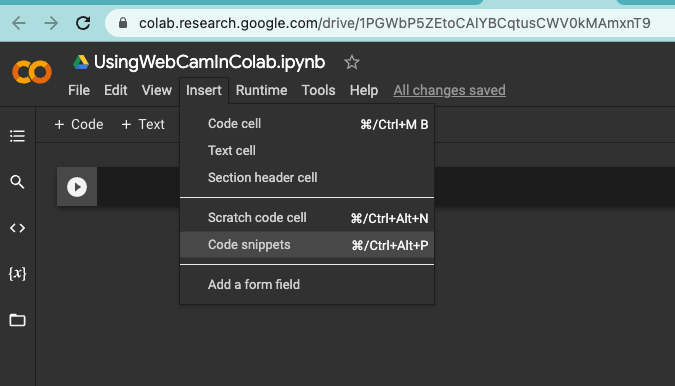


# Original Snippet

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


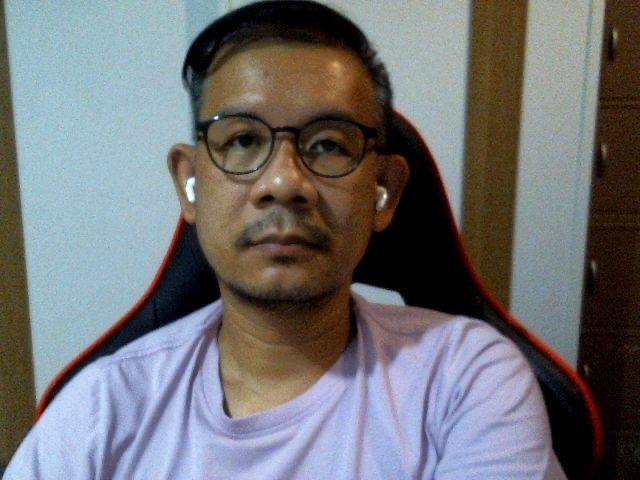

In [2]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Modified Snippet

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    // define variables
    let camera_id = ''; // current camera id
    let stream = null; // current stream
    let devices = []; // all camera
    const div = document.createElement('div'); // parent div playground
    const camera_list = document.createElement('select'); // camera dropdown
    const camera_label = document.createElement('h3'); // current selected camera
    const video = document.createElement('video'); // video object

   // scan all cameras
    async function scan_cameras() {
      let camera_found = false;

      await navigator.mediaDevices
          .enumerateDevices()
          .then((deviceInfos) => {
            deviceInfos.forEach((deviceInfo) => {
               if (deviceInfo.kind === 'videoinput') {
                if(!camera_found) {
                  camera_label.textContent = `Camera: ${deviceInfo.label}`;
                  camera_id = deviceInfo.deviceId
                  camera_found = true
                }
                devices.push(deviceInfo)
              }
            })
            
          })
     
      div.appendChild(camera_label);
    }

    // change camera by id
    async function change_camera(e) {
      camera_id = e.target.value;
      camera_label.textContent = `Camera: ${devices.filter(i => i.deviceId == camera_id)[0].label}`;
      await start_camera();
    }

    // stop all active camera
    async function stop_camera() {
      if(stream){
        await stream.getVideoTracks().forEach(track => track.stop());
      }
    }

    // start camera by selected id
    async function start_camera() {
      await stop_camera();
      stream = await navigator.mediaDevices.getUserMedia({video: {deviceId: {exact: camera_id}, audio: false}});
      video.srcObject = stream;
      await video.play();
      }

 
    // create camera list dropdown
    function create_camera_select() {
      camera_list.appendChild(new Option("Select Camera", 0))

      devices.forEach((device, i) => {
        camera_list.appendChild(new Option(device.label || `Camera ${i + 1}`, device.deviceId));
      })

      div.appendChild(camera_list);
      camera_list.addEventListener("change", change_camera);

    }

    // take photo
    async function takePhoto(quality) {
      await scan_cameras();
      create_camera_select();

      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      video.style.display = 'block';
      document.body.appendChild(div);
      div.appendChild(video);
      await start_camera();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      await stop_camera();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
      
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

For FireFox and Safari if device name not show you must allow permission to access all cameras.

<IPython.core.display.Javascript object>

Saved to photo.jpg


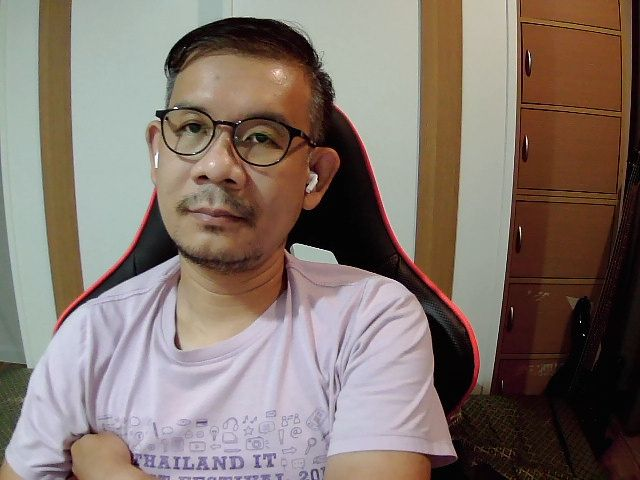

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename, width=350))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Use image 

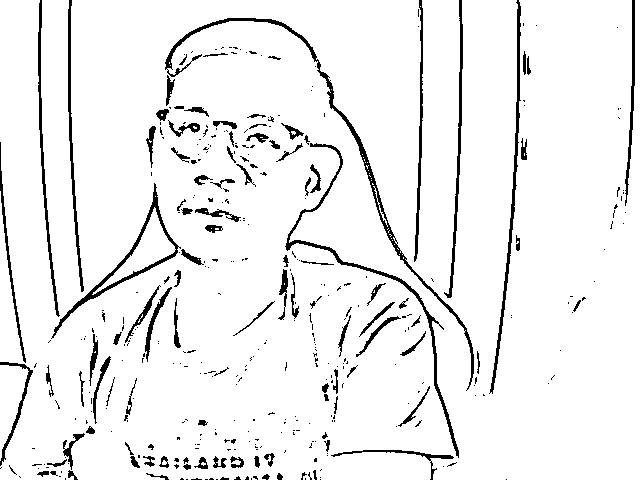

In [5]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("photo.jpg")
line_size = 7
blur_value = 7

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray, blur_value)
gartoon = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

cv2_imshow(gartoon)